In [1]:
import requests
user = "startupfairy"
server = "sprotasov.ru"
port = 12345
url = "http://{0}:{1}/{2}".format(server, port, user)
raw = requests.get(url).text
lines = raw.strip().split('\n')
# include common oop model
%run kidoop.py
events = [Item(line) for line in lines]
print(events[:2], "...", events[-3:])

[@2018-02-26 23:23:54 случилось mom_food с аргументами ['Какаушка'], @2018-02-26 23:29:42 случилось sleep с аргументами []] ... [@2018-03-11 14:48:07 случилось mom_food с аргументами ['Суп куриный с лапшой, сосиска, пастилка яблочная, груша'], @2018-03-12 11:30:15 случилось child_weight с аргументами ['3270'], @2018-03-12 11:32:18 случилось mom_food с аргументами ['Финик, пастила, салат зелёный, йогурт с грушей и злаками']]


In [2]:
import datetime as dt
weights = Item.get_all(events, 'child_weight')
print(weights[0])

@2018-03-04 17:48:57 случилось child_weight с аргументами ['3310']


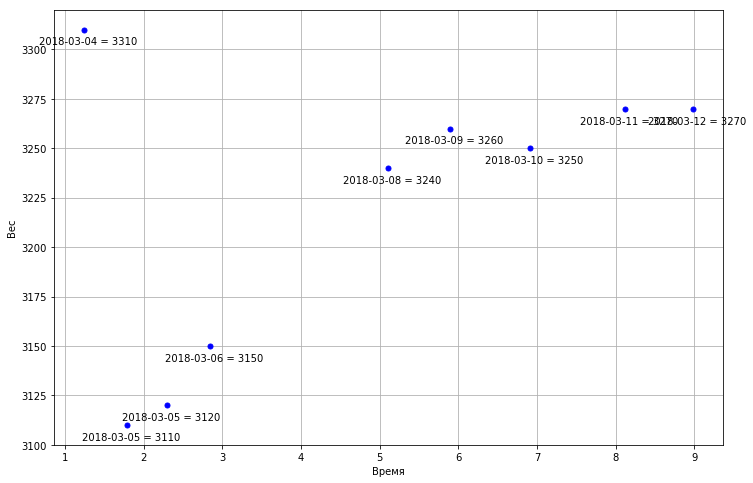

In [3]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
vals = [w.get_weight() for w in weights]
labels = [s.time.date() for s in weights]
times = [w.days_from(dt.datetime(2018, 3, 3, 12)) for w in weights]
plt.plot(times, vals, 'bo', markersize=5)
for i in range(len(labels)):
    plt.annotate(str(labels[i]) + " = " + str(vals[i]), 
                 xy=(times[i], vals[i]), xycoords="data", 
                 textcoords="offset pixels", xytext=(-45, -15))
plt.grid(True)
plt.xlabel('Время')
plt.ylabel('Вес')
plt.show()